In [1]:
import torch
import numpy as np
import pandas as pd
from itertools import cycle
from torch_geometric.data import Data
from src.data_preparation import DataPreprocessor
from src.graph_data_loader import graph_loader

### Generating Train Test Split Excel Files

In [2]:
!python src/generate_splits.py

### Graph Dataloader Example

In [3]:
train_graph, train_target, test_graph, test_target = graph_loader(split_type='mutually_exclusive')

Reading train data from  data/splits/shuffled/train.xlsx
Reading test data from  data/splits/shuffled/test.xlsx


#### Train Graph Attributes

In [4]:
print("Number of nodes: ", train_graph.num_nodes)
print("Number of features per node: ", train_graph.num_node_features)
print("Number of edges: ", train_graph.num_edges)
print("Number of edge attributes: ", train_graph.num_edge_features)
print("Undirected: ", train_graph.is_undirected())
print("Isolated Nodes: ", train_graph.has_isolated_nodes())
print("Self Loops: ", train_graph.has_self_loops())

Number of nodes:  7085
Number of features per node:  20
Number of edges:  22726
Number of edge attributes:  0
Undirected:  True
Isolated Nodes:  True
Self Loops:  False


#### Test Graph Attributes

In [5]:
print("Number of nodes: ", test_graph.num_nodes)
print("Number of features per node: ", test_graph.num_node_features)
print("Number of edges: ", test_graph.num_edges)
print("Number of edge attributes: ", test_graph.num_edge_features)
print("Undirected: ", test_graph.is_undirected())
print("Isolated Nodes: ", test_graph.has_isolated_nodes())
print("Self Loops: ", test_graph.has_self_loops())

Number of nodes:  3037
Number of features per node:  20
Number of edges:  4288
Number of edge attributes:  0
Undirected:  True
Isolated Nodes:  True
Self Loops:  False


In [22]:
from sklearn import metrics
from src.models import PyGod

swap_rate = 0.01

model = PyGod("mlpae", swap_rate)
model.train(train_graph)
train_outlier_scores = model.get_train_scores()
test_outlier_scores = model.predict(test_graph)

print("Train: ", metrics.roc_auc_score(train_target,train_outlier_scores))
print("Test: ", metrics.roc_auc_score(test_target,test_outlier_scores))

In [45]:
import numpy as np 

def get_random_score(test_target):
    test_outlier_scores = np.random.rand(len(test_target))

    print(f"\n{model_name} train score: ", metrics.roc_auc_score(train_target, train_outlier_scores))

    test_score = metrics.roc_auc_score(test_target,test_outlier_scores)
    print(f"{model_name} test score: ", test_score)

    fpr, tpr, _ = metrics.roc_curve(test_target, test_outlier_scores)

    return{
        'label': "{}, auc={:.3f}".format("random_scores", test_score),
        'fpr': fpr,
        'tpr': tpr
    }


gcnae train score:  0.6414670463921462
gcnae test score:  0.5194665742985798
calculating for model mlpae
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



mlpae train score:  0.4908350519184782
mlpae test score:  0.502692529730978
calculating for model gcnae
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



gcnae train score:  0.6073731709343815
gcnae test score:  0.6521533310241312
calculating for model dominant
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



dominant train score:  0.45509855319891857
dominant test score:  0.4833125505137975
calculating for model scan
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/models/scan.py:186: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '



scan train score:  0.5187718180574405
Results scoring error for scan:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model radar
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')
/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/models/radar.py:142: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '



radar train score:  0.5131944951556464
Results scoring error for radar:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model anomalous
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')
/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/models/anomalous.py:143: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '



anomalous train score:  0.46889591711173617
Results scoring error for anomalous:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model one
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx
Model calculation error for one:
operands could not be broadcast together with shapes (3037,3037) (7085,7085) 

one train score:  0.46889591711173617
Results scoring error for one:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model done
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


Model calculation error for done:
mat1 and mat2 shapes cannot be multiplied (3037x3037 and 7085x32)

done train score:  0.46889591711173617
Results scoring error for done:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model adone
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')


Model calculation error for adone:
mat1 and mat2 shapes cannot be multiplied (3037x3037 and 7085x32)

adone train score:  0.46889591711173617
Results scoring error for adone:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model gaan
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')
/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/models/gaan.py:239: UserWarning: The model is transductive only. Training data is used to predict
  warnings.warn('The model is transductive only. '



gaan train score:  0.4981769148060202
Results scoring error for gaan:
Found input variables with inconsistent numbers of samples: [3037, 7085]
calculating for model ocgnn
Reading train data from  data/splits/mutually_exclusive/train.xlsx
Reading test data from  data/splits/mutually_exclusive/test.xlsx


/Users/bpogodzinski/.local/share/virtualenvs/project-gdFo14Ij/lib/python3.10/site-packages/pygod/utils/utility.py:52: UserWarning: The cuda is not available. Set to cpu.
  warnings.warn('The cuda is not available. Set to cpu.')



ocgnn train score:  0.3975293082768236
ocgnn test score:  0.37991686872185654


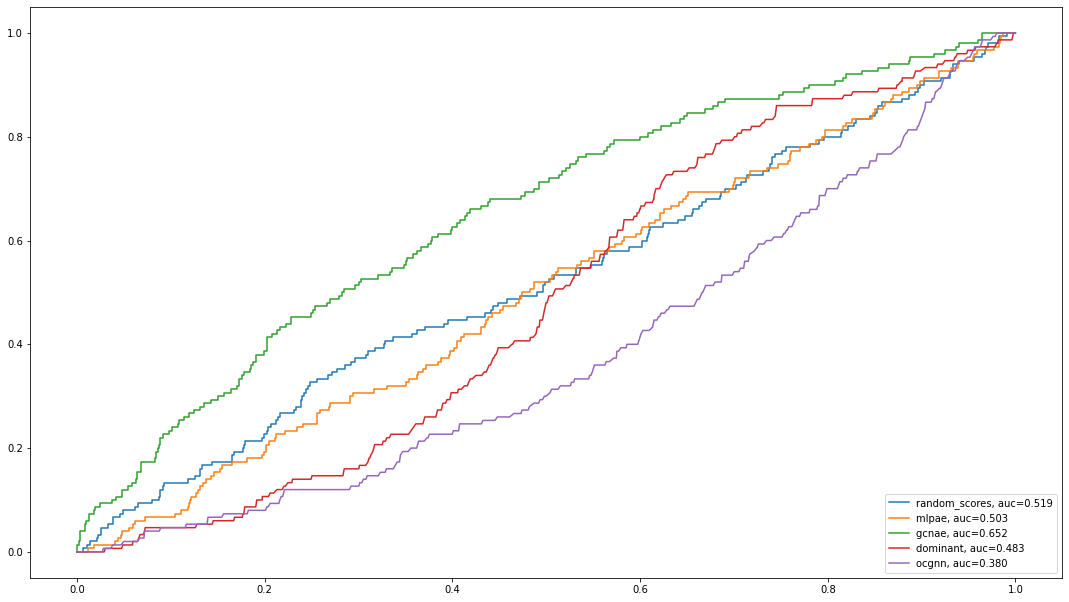

In [47]:
from src.models import PyGod


swap_rate=0.05
model_names = ['mlpae', 'gcnae', 'dominant', 'scan', 'radar', 'anomalous', 'one', 'done', 'adone', 'gaan', 'ocgnn']



def get_model_scores(model_name, split_type='mutually_exclusive', swap_rate=0.01):
    train_graph, train_target, test_graph, test_target = graph_loader(split_type=split_type, swap_rate=swap_rate)
    
    model = PyGod(model_name, swap_rate)
    model.train(train_graph)
    
    train_outlier_scores = model.get_train_scores()
    test_outlier_scores = model.predict(test_graph)
    
    
    return train_outlier_scores, train_target, test_outlier_scores, test_target
    
    
model_roc_curves = []


model_roc_curves.append(get_random_score(test_target))

    
for model_name in model_names:
    print(f"calculating for model {model_name}")
    try:
        train_outlier_scores, train_target, test_outlier_scores, test_target = get_model_scores(model_name, 
                                                                                                swap_rate=swap_rate)
    except Exception as e:
        print(f"Model calculation error for {model_name}:")
        print(e)
    
    try:
        print(f"\n{model_name} train score: ", metrics.roc_auc_score(train_target, train_outlier_scores))

        test_score = metrics.roc_auc_score(test_target,test_outlier_scores)
        print(f"{model_name} test score: ", test_score)

        fpr, tpr, _ = metrics.roc_curve(test_target, test_outlier_scores)

        model_roc_curves.append({
            'label': "{}, auc={:.3f}".format(model_name, test_score),
            'fpr': fpr,
            'tpr': tpr
        })
    except Exception as e:
        print(f"Results scoring error for {model_name}:")
        print(e)    


        
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
    
for curve in model_roc_curves:
    plt.plot(curve['fpr'],curve['tpr'],label=curve['label'])
    
    
plt.legend(loc=4)
plt.show()